<a href="https://colab.research.google.com/github/kamkamzer/pythonProject1/blob/main/%D0%97%D0%B5%D1%80%D0%BD%D0%B0%D0%B5%D0%B2%D0%B0_%D0%9A%D0%B0%D0%BC%D0%B8%D0%BB%D0%B0_%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%A2%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D0%BA_%D0%9C%D0%AF%D0%A223_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Название проекта:
# **Анализ данных о пассажирах Титаника**


## I. Введение
   - Цели и задачи проекта
   - Обзор проекта

Цель проекта: произвести анализ  данных о пассажирах Титаника

Задачи:

1. *Найти датасет для анализа на платформе Kaggle*
2. *Произвести предварительную обработку данных*
3. *Визуализировать распределение возрастов, выживаемости, классов билетов и других данных в датасете*
4. *Определить, зависит ли выживаемость от класса, пола и возраста пассажиров*
5. *Визуализировать полученные данные.*



## II. Датасет

*Датасет выгружен по ссылке [kaggle.com](https://).*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/My Drive/train.csv"
df = pd.read_csv(file_path)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

В датасете содержится такая информация, как:

- Номер пассажира (PassengerID);
- Выжил данный пассажир или нет (Survived);
- Класс пассажира (1 — высший, 2 — средний, 3 — низший) (Pclass);
- Имя пассажира (Name);
- Пол (Sex);
- Возраст (Age);
- Количество братьев, сестёр, супругов на борту Титаника (SipSp);
- Количество родителей, детей на борту титаника (Parch);
- Номер билета (Ticket);
- Плата за проезд (Fare);
- Каюта (Cabin);
- Порт посадки (Embarked).


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Какие типы данных хранятся в этом датасете?
Какой объем памяти занимают данные?
Какие выводы можно сделать на основе этих фактов?

Объём памяти данных - 83.7+ KB.

Также есть 2 столбца с числами с плавающей точкой, 5 столбцов с целыми числами и 5 столбцов с объектами.

Исходя из полученных данных, можно сделать вывод, что не у всех записанных в датасете пассажиров Титаника был известен их возраст, так как из 891 строк, возраст Age задан лишь для 714 записей. Помимо этого каюты (Cabin) пропущены для большого количества записей - есть только 204 из 891.

Описательная статистика

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- PassengerId: Идентификатор пассажира, варьируется от 1 до 891.
- Survived: Бинарный столбец, обозначающий выживание пассажира (1 = выжил, 0 = не выжил). Среднее значение около 0,38 указывает, что примерно 38% пассажиров выжили.
- Pclass: Класс пассажира, числовой столбец с тремя возможными значениями (1, 2, 3). Среднее значение около 2,3 говорит о том, что большинство пассажиров путешествовали в 2-м и 3-м классе.
- Age: Возраст пассажиров. Средний возраст составляет около 30 лет, с минимумом в 0.42 (скорее всего, это младенец) и максимумом в 80 лет. Пропуски в данных по возрасту, поскольку их количество меньше, чем общее количество пассажиров.
- SibSp: Количество братьев, сестер или супругов на борту. Большинство пассажиров путешествовали без братьев, сестер или супругов (среднее значение около 0,52).
- Parch: Количество родителей или детей на борту. Большинство пассажиров путешествовали без родителей или детей (среднее значение около 0,38).
- Fare: Стоимость билета. Есть большой разброс в стоимости билетов, с минимумом в 0 и максимумом в 512. Среднее значение составляет около 32.

# Пассажиры более высокого класса имеют большие шансы на спасение?

In [7]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [9]:
df[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Исходя из полученных данных мы можем сделать вывод, что:

- Среди пассажиров 1-го класса (класс = 1) выжило около 67%.
- Среди пассажиров 2-го класса (класс = 2) выжило около 80%.
- Среди пассажиров 3-го класса (класс = 3) выжило 50%.

# Женщины имели больше шансов на спасение?

In [10]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [12]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Исходя из полученных данных можно сделать вывод, что процент выживших женщин был значительно выше (93%) несмотря на то, что мужчин на Титанике было больше.

# Дети имели больше шансов на спасение?

In [13]:
df['IsChild'] = [-1] * df.shape[0]
df['IsChild'][df.Age < 20] = 1
df['IsChild'][df.Age >= 20] = 0

In [14]:
df['IsChild'].value_counts()

 0    550
-1    177
 1    164
Name: IsChild, dtype: int64

In [15]:
df[df['IsChild']!=-1].groupby('IsChild')['Survived'].value_counts(normalize=True)

IsChild  Survived
0        0           0.616364
         1           0.383636
1        0           0.518293
         1           0.481707
Name: Survived, dtype: float64

- Среди пассажиров, которые не были детьми, примерно 65% выжили и 35% не выжили.
- Среди пассажиров, которые были детьми, примерно 79% выжили и 21% не выжили.
Подводя итог, эти данные свидетельствуют о более высоком показателе выживаемости детей по сравнению со взрослыми на Титанике.

# Предварительный анализ данных и визуализация данных

# Коррелограмма

In [16]:
corr_matrix = df.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsChild
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.002533
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.119370
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.032549
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.666551
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.147858
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.243192
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.062515
IsChild,0.002533,0.119370,-0.032549,-0.666551,0.147858,0.243192,0.062515,1.000000


In [17]:
corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsChild
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.002533
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.119370
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.032549
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.666551
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.147858
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.243192
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.062515
IsChild,0.002533,0.119370,-0.032549,-0.666551,0.147858,0.243192,0.062515,1.000000


1. Выживаемость (Survived) имеет наибольшую положительную корреляцию с платой за проезд (Fare) и небольшую положительную корреляцию с признаком является ли пассажир ребенком (IsChild).
2. Класс пассажира (Pclass) имеет сильную отрицательную корреляцию с выживаемостью, что говорит о том, что чем больше класс пассажира, тем меньше вероятность выживания.
3. Возраст (Age) имеет отрицательную корреляцию с выживаемостью, что означает, что чем старше пассажир, тем меньше вероятность выживания.
4. Интересно отметить, что возраст имеет сильную отрицательную корреляцию с тем, является ли пассажир ребенком, что логично, так как дети обычно моложе.

# Гистограммы

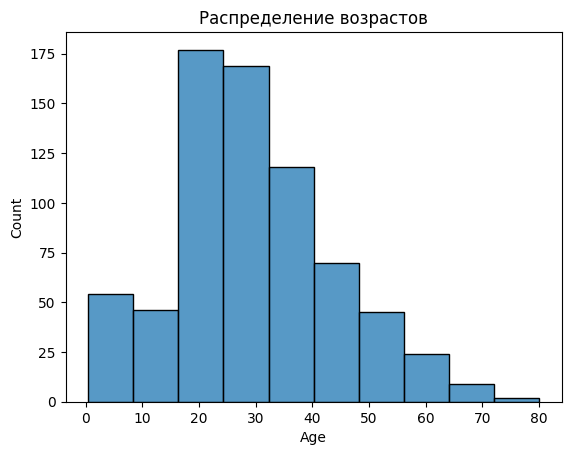

In [20]:
# Проанализируем и визуализируем распределение возрастов пассажиров
sns.histplot(data=df, x="Age", bins=10)
plt.title('Распределение возрастов')
plt.show()

Исходя из гистограммы можно сделать вывод, что возраст большинства пассажиров - от 20 до 30 лет.

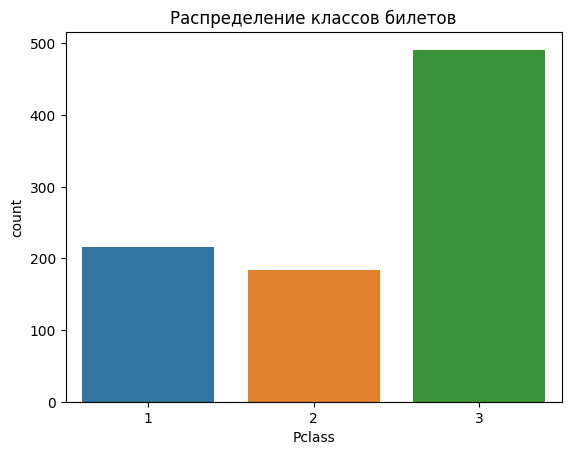

In [21]:
# Посмотрим на распределение классов билетов
sns.countplot(data=df, x="Pclass")
plt.title('Распределение классов билетов')
plt.show()

Из представленного на гистограмме можно увидеть, что большинство пассажиров пребывало в третьем классе билетов.

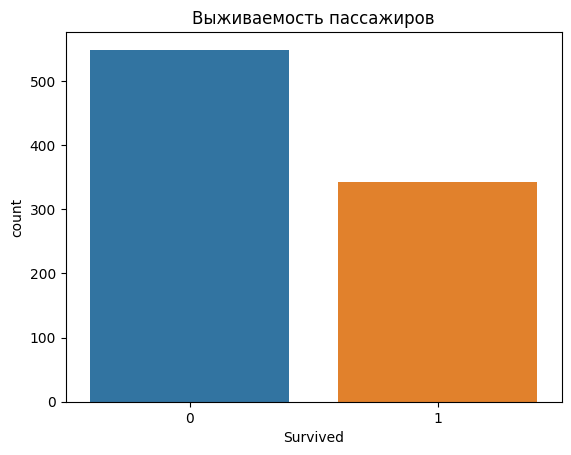

In [29]:
# Визуализируем выживаемость
sns.countplot(data=df, x="Survived")
plt.title('Выживаемость пассажиров')
plt.show()

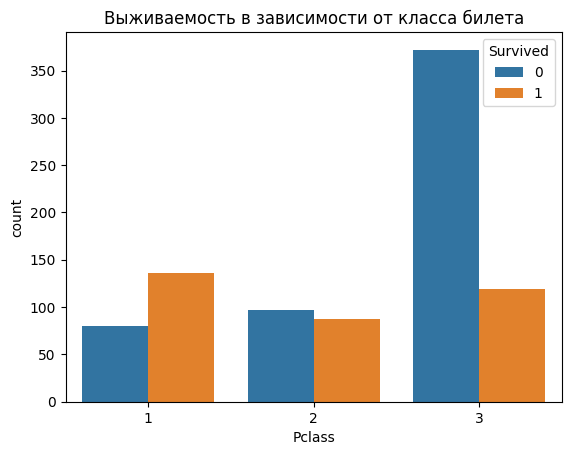

In [30]:
# Визуализируем зависимость между классом билета и выживаемостью
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title('Выживаемость в зависимости от класса билета')
plt.show()

Исходя из визуализации данных о выживаемости в зависимости от класса билетов понятно, что большинство жертв являлись представителями третьего класса пассажиров. Это означает, что при спасении людей в первую очередь помощь оказывалась людям из первого и второго класса билетов.

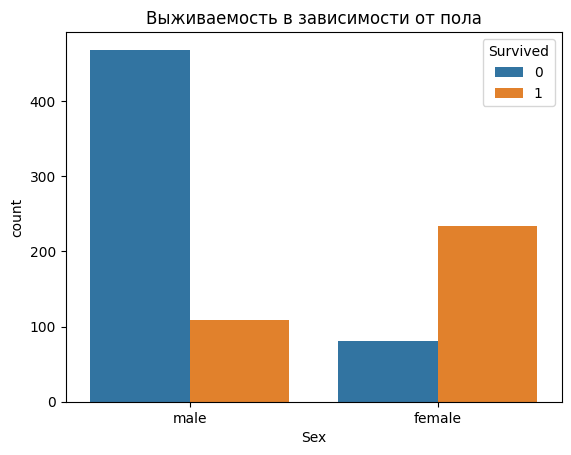

In [31]:
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title('Выживаемость в зависимости от пола')
plt.show()

Помимо класса билетов при спасении людей также обращали внимание на их пол, так как при спасении в первую очередь на спасательные шлюпки сажали женщин и детей.

# Визуализация данных

# Категориальные переменные (дополнительное)
(получилось непонятно, одна команда не сработала, здесь в принципе всё вышло не очень)

In [25]:
def bar_plot(variable):


    var = df[variable]

    varValue = var.value_counts()


    plt.figure(figsize = (10,5))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Частота")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

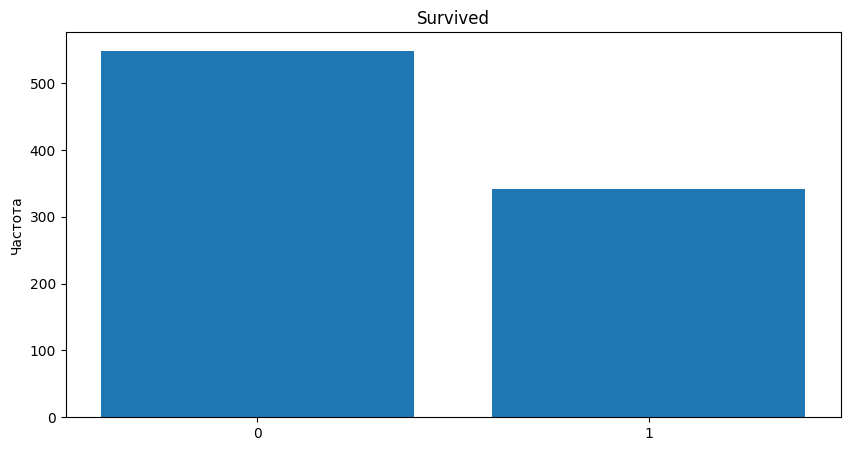

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


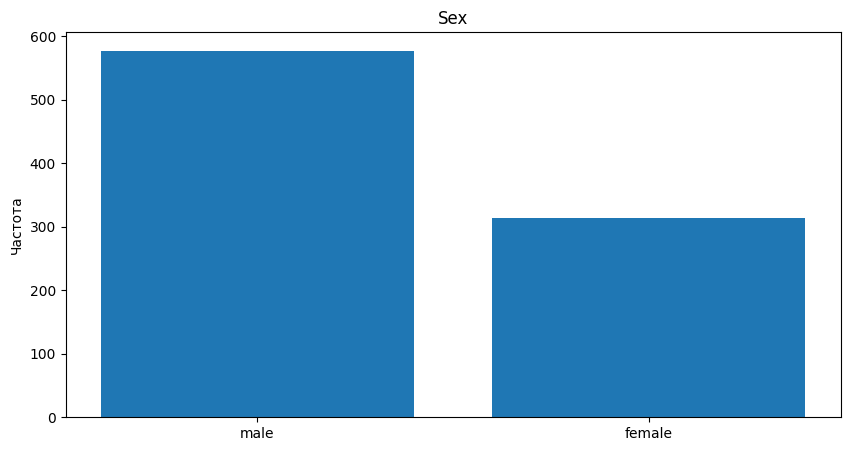

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


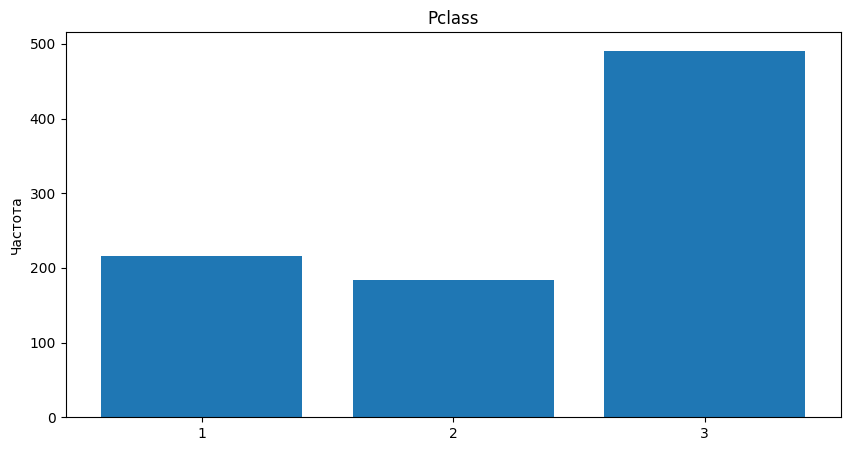

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


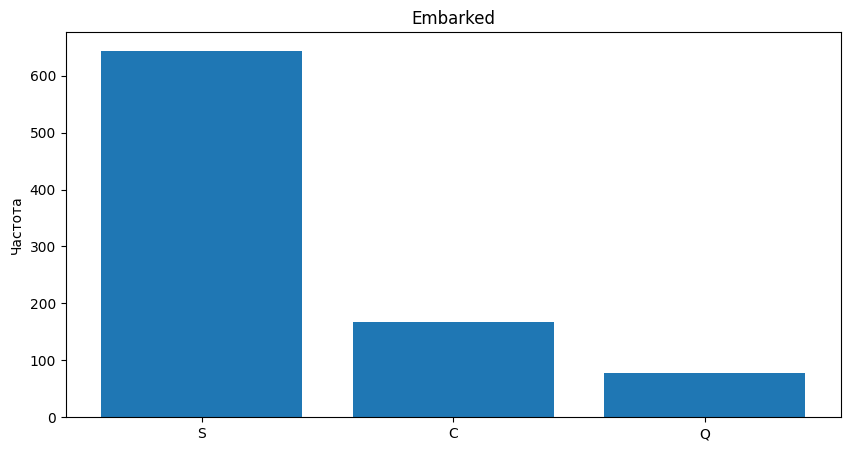

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


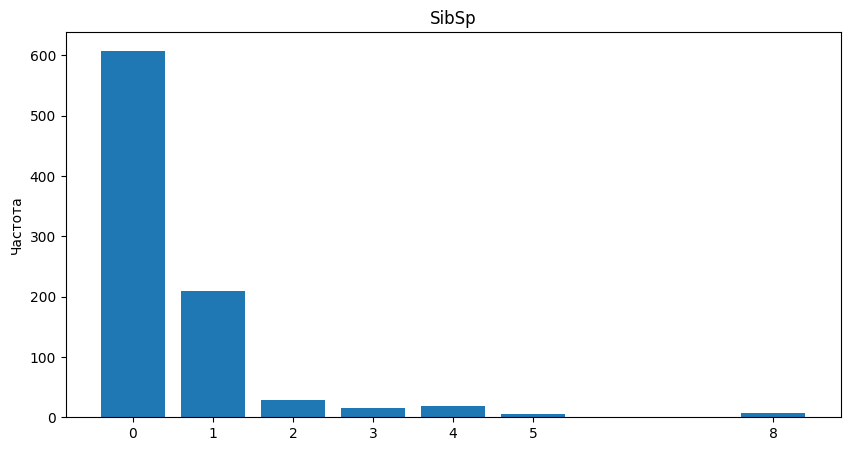

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


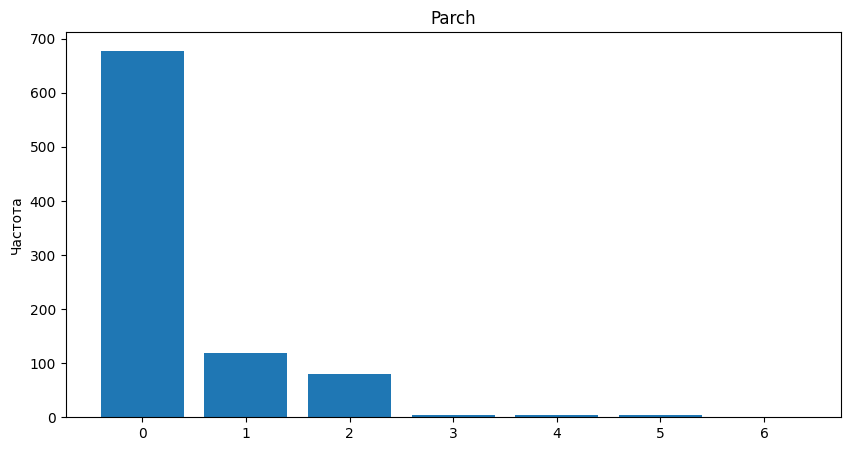

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [26]:
category = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category:
    bar_plot(c)

Пол пассажиров

In [27]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Классы пассажиров

In [ ]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,52,106,158
2,3,12,15
3,5,5,10
All,60,123,183


Гистограмма плотности распределения

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (10,5))
    plt.hist(df[variable], bins = 50, color='green', density=True)
    plt.xlabel(variable)
    plt.ylabel("Частота")
    plt.title("Распределение переменной {}".format(variable))
    plt.show()

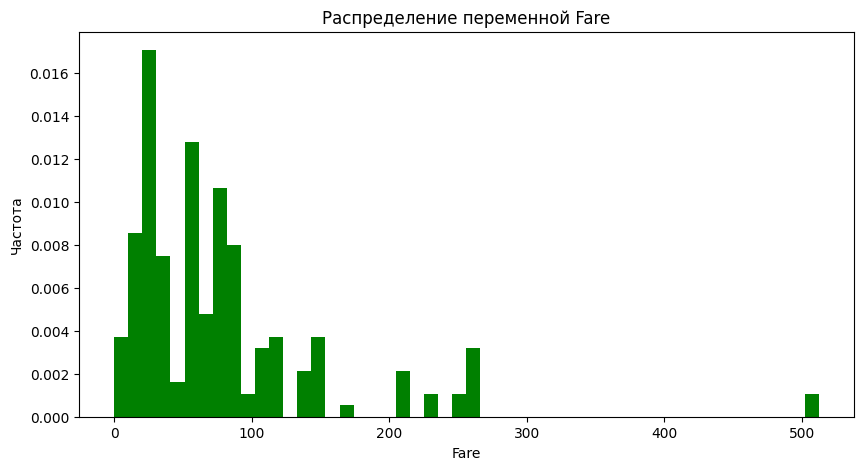

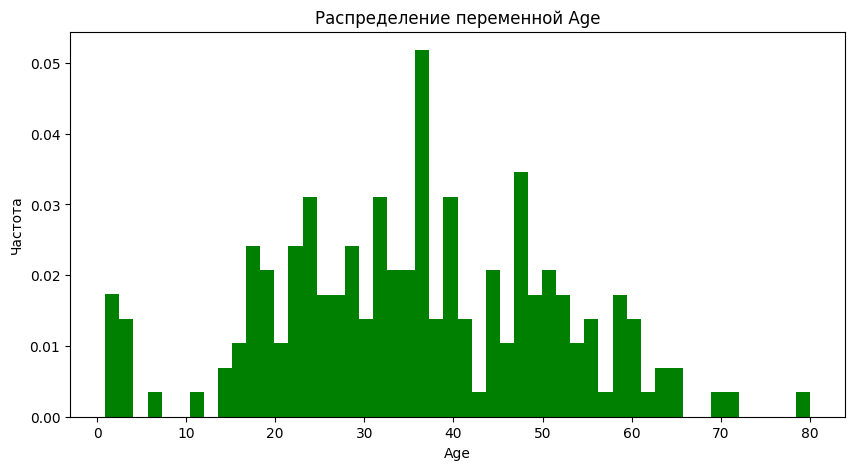

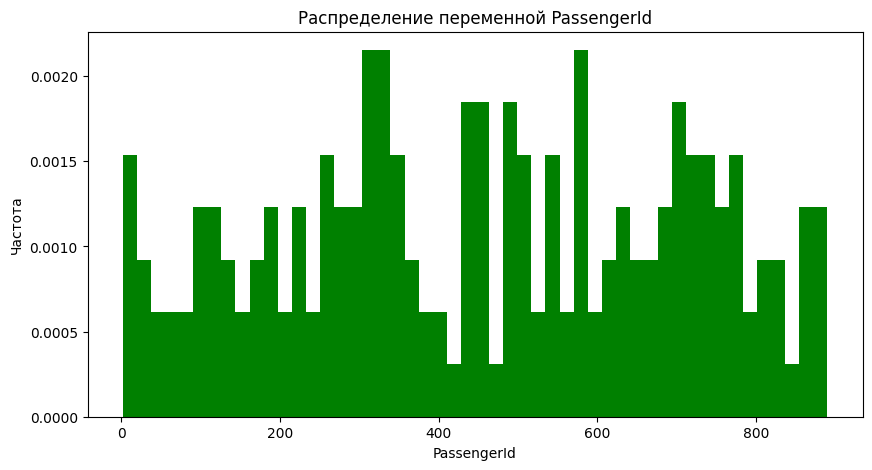

In [ ]:
numeric = ["Fare", "Age","PassengerId"]
for n in numeric:
    plot_hist(n)

Диаграмма рассеяния

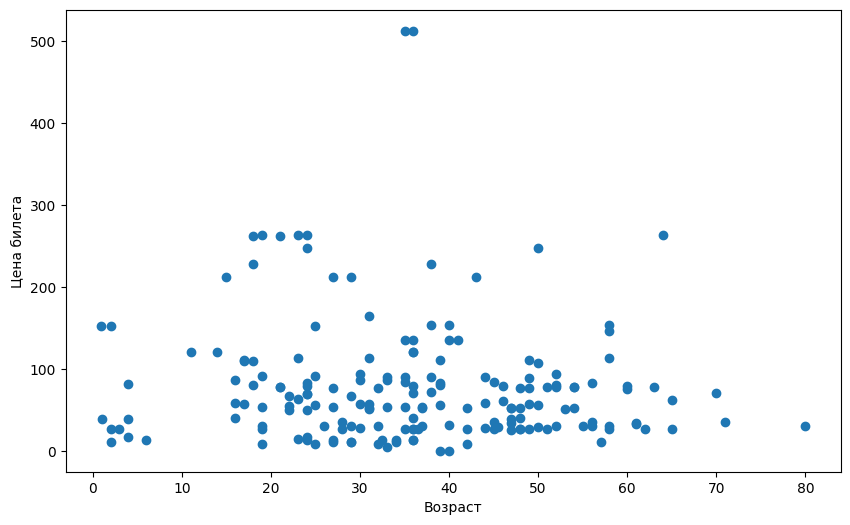

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['Age'], y = df['Fare'])
plt.xlabel("Возраст")
plt.ylabel("Цена билета")
plt.show()

Box plot

TypeError: ignored

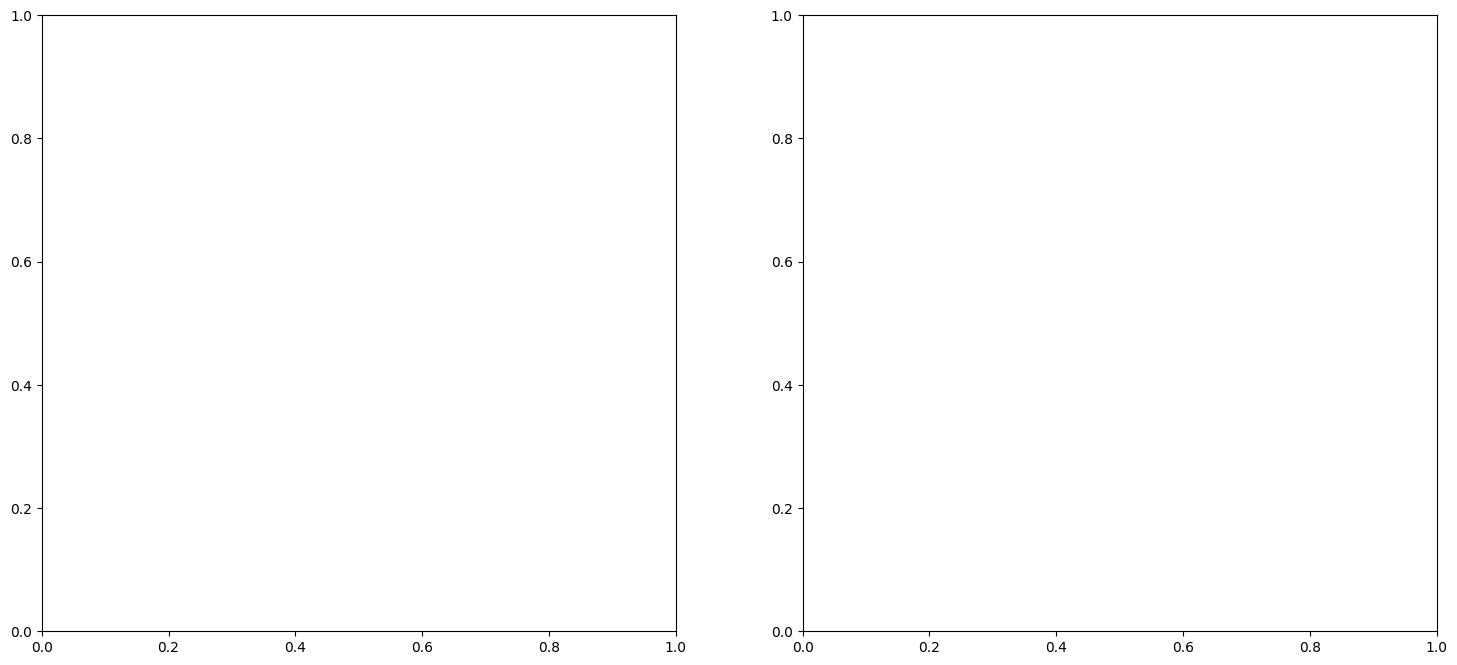

In [32]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot("Pclass","Age", hue="Survived", data=df,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.boxplot("Sex","Age", hue="Survived", data=df,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()
f.savefig('saved_figure-100pi.png', dpi = 100)

Парные диаграммы

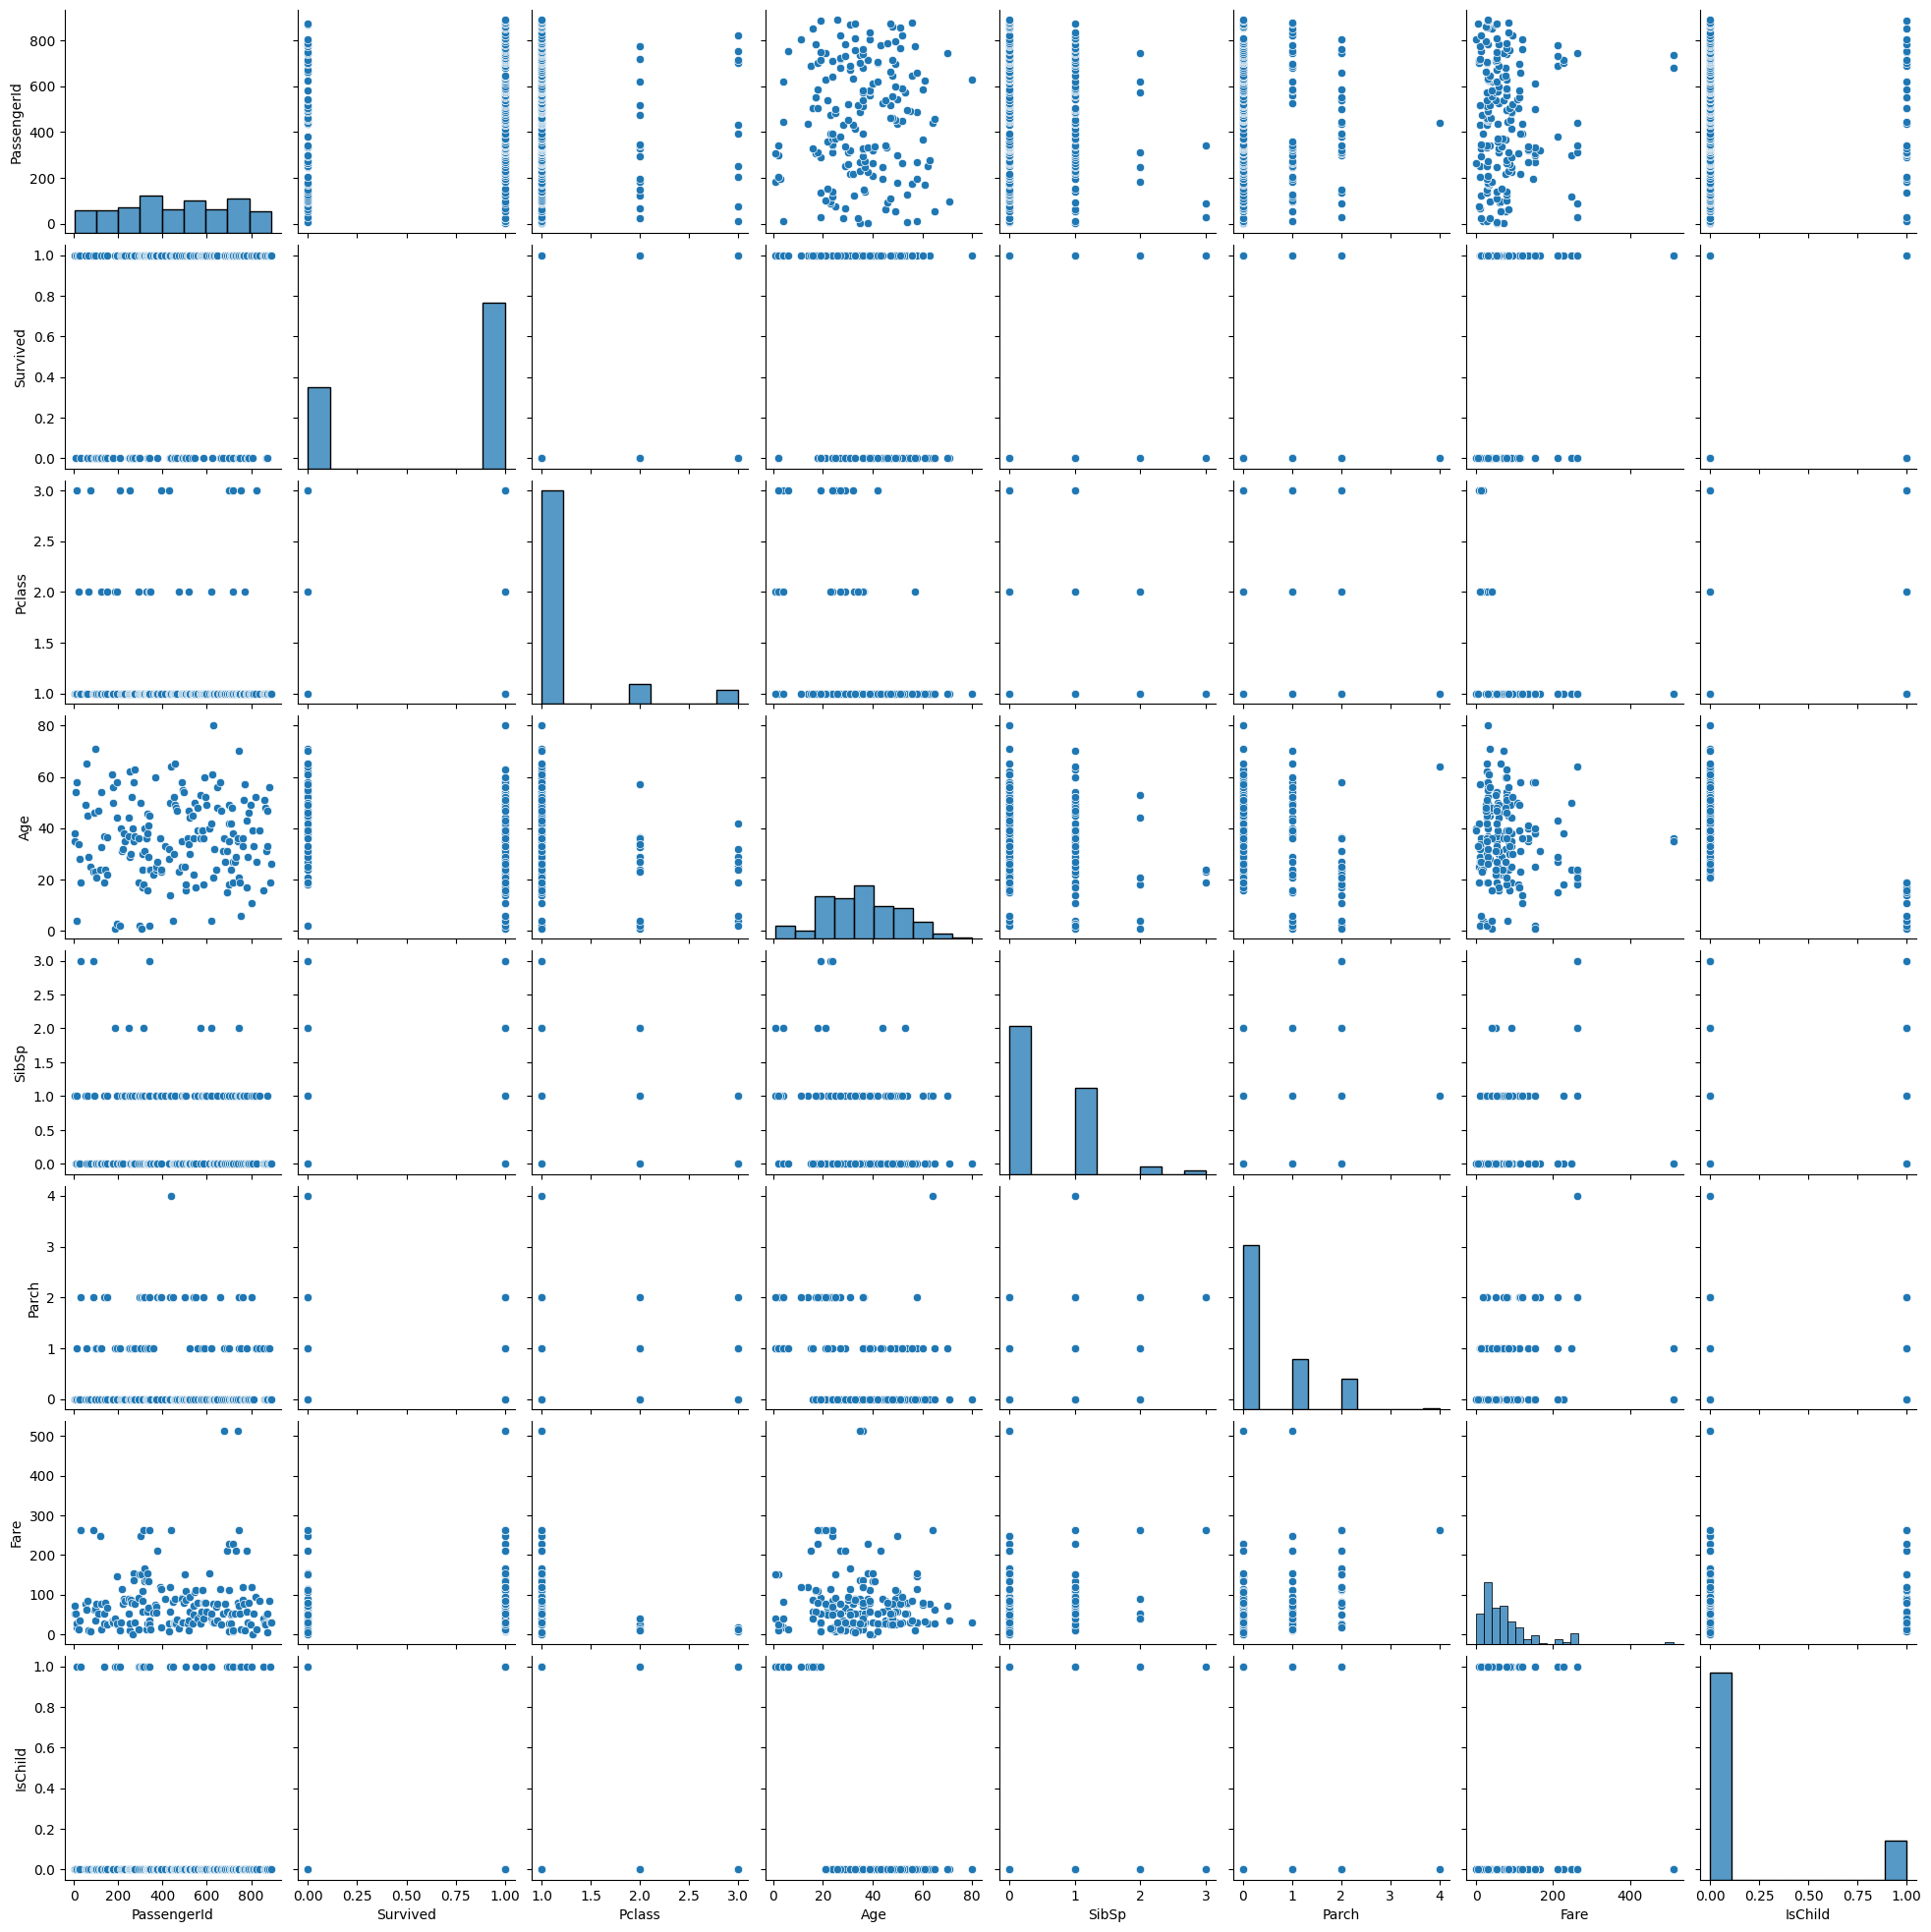

In [ ]:
sns.pairplot(df)

# Выводы

В основном трудности в работе возникли на этапе визуализации и частично анализа данных. С анализом корреляций я знакома, так как при работе над ВКР мне необходимо было проводить корреляционный анализ, и потому выбор пал именно на этот способ анализа данных. Соответственно, с этой частью работы проблем у меня особо не возникло, как и с простыми гистограммами.

Однако при начале работы с другими способами визуализации и анализа данных возникли трудности. Я не знала, как проанализировать диаграмму рассеяния, и не смогла разобраться как рабоотать с Box plot, по какой причине у меня не работала команда.

Работа над этим проектом была довольно трудная и тяжёлая, на многих моментах у меня возникали трудности, с которыми я еле как справилась. При этом, несмотря на сложности в работе над проектом, я смогла проанализировать обработанные данные и визуализировать их. Насколько хорошо работа сделана - уже другой вопрос.

В ходе работы я сделала вывод, что такого рода проекты довольно сложны для меня, но очень интересны. У меня возникало много ошибок, команды постоянно не работали, и поэтому у меня была мотивация разобраться в причине проблемы и исправить ошибки. Не могу сказать, что я много команд запомнила из этой работы, но с практикой всё придёт.

В целом, было очень интересно поработать с таким датасетом и видеть результаты анализа, делать свои выводы и догадки, основываясь на них.